In [20]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('data/fraud_oracle_processed.csv')

In [28]:
df.head()

,Unnamed: 0,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,Age,...,AddressChange_Claim,NumberOfCars,Year,BasePolicy,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,MonthClaimed,UnusualDeductible,ClaimsPerAgent
0,0,Dec,5,Wednesday,Honda,Urban,Tuesday,1,0,21,...,2,3,1994,Liability,False,True,False,1,0,15179
1,1,Jan,3,Wednesday,Honda,Urban,Monday,4,1,34,...,0,1,1994,Collision,False,True,False,1,0,15179
2,2,Oct,5,Friday,Honda,Urban,Thursday,2,1,47,...,0,1,1994,Collision,True,False,False,11,0,15179
3,3,Jun,2,Saturday,Toyota,Rural,Friday,1,1,65,...,0,1,1994,Liability,True,False,False,7,0,15179
4,4,Jan,5,Monday,Honda,Urban,Tuesday,2,0,27,...,0,1,1994,Collision,False,True,False,2,0,15179


## Touch up on data cleaning

In [33]:
# Remove index column
df = df.iloc[:, 1:]

## Overview of value counts

In [34]:
for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for Month:
Month
Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: count, dtype: int64


Value counts for WeekOfMonth:
WeekOfMonth
3    3640
2    3558
4    3398
1    3187
5    1637
Name: count, dtype: int64


Value counts for DayOfWeek:
DayOfWeek
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: count, dtype: int64


Value counts for Make:
Make
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: count, dtype: int64


Value counts for AccidentArea:
AccidentArea
Urban    13822
Rural     1598
Name: count, d

## Variables correlation heatmap

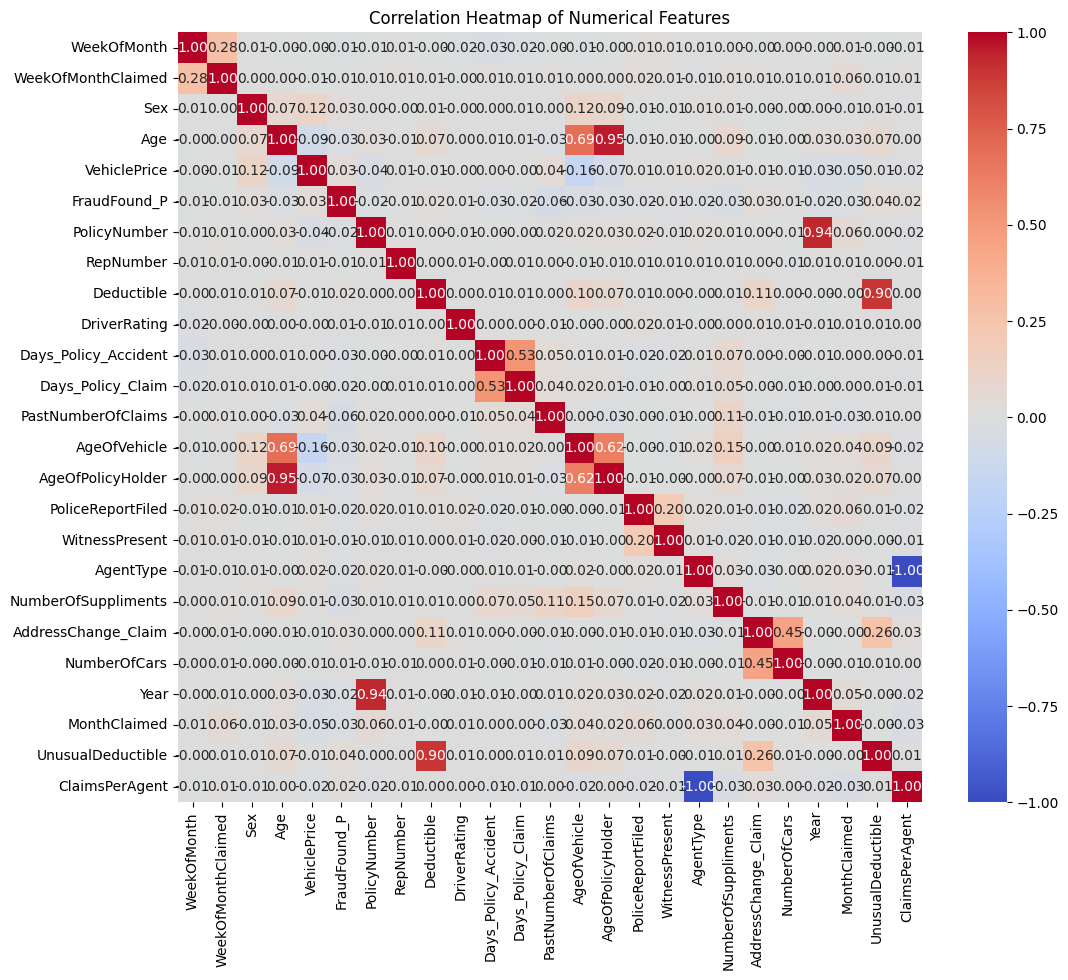

In [37]:
# Select numerical columns
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Identifying significant variables

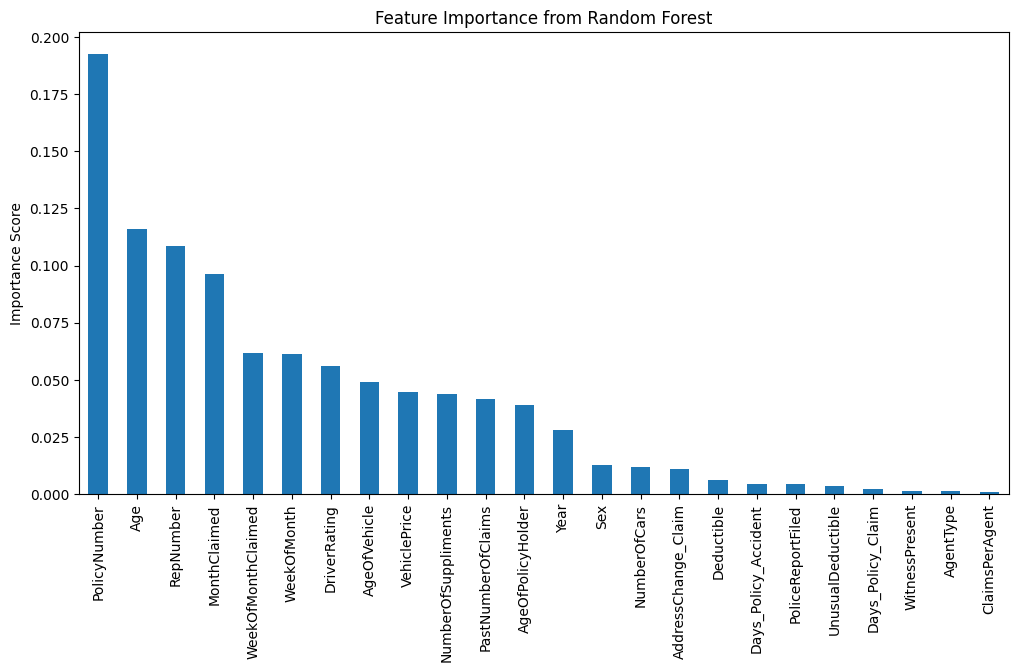

In [38]:
from sklearn.ensemble import RandomForestClassifier

X = numeric_df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

rf = RandomForestClassifier(random_state=123)
rf.fit(X, y)
importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
importance.plot(kind='bar')
plt.title("Feature Importance from Random Forest")
plt.ylabel("Importance Score")
plt.show()

## Sampling methods

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming X and y have been defined and preprocessed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

smote = SMOTE(random_state=123)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

rf = RandomForestClassifier(random_state=123)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


ImportError: cannot import name 'tarfile_extractall' from 'sklearn.utils.fixes' (C:\Users\teomi\penv\lib\site-packages\sklearn\utils\fixes.py)

## By month

C:\Users\teomi\AppData\Local\Temp\ipykernel_13796\3084433461.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], palette='viridis')


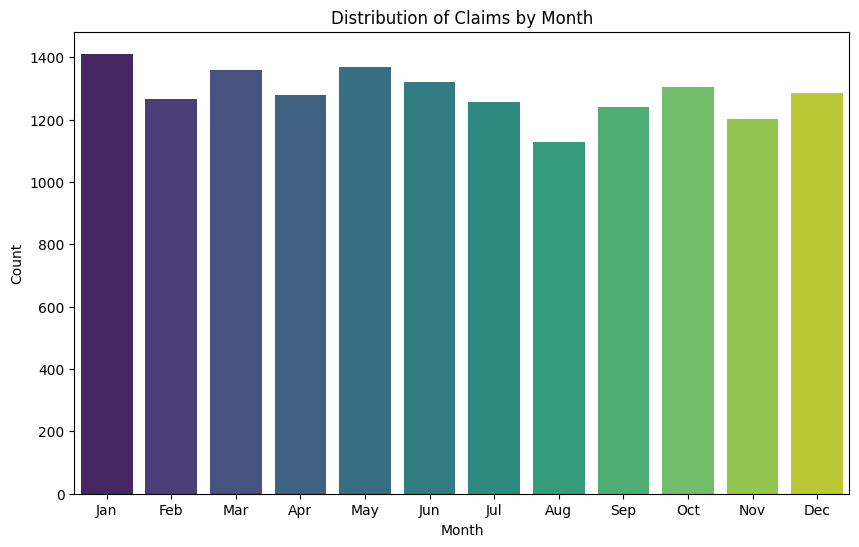

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], palette='viridis')
plt.title('Distribution of Claims by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()